In [1]:
import torch
from torchsummary import summary
import sys
import numpy as np
sys.path.append('../../LearningByCheating')
from bird_view.models.image import ImagePolicyModelSS
import matplotlib.pyplot as plt
model = ImagePolicyModelSS('resnet34').to('cuda')
model.load_state_dict(torch.load('/home/moonlab/Documents/LearningByCheating/training/image_direct_unbiased_traffic_iitj/model-915.th'))
model.eval()
rgb_left = np.load('rgb_left.npy')
rgb_right = np.load('rgb_right.npy')
model(torch.Tensor(np.transpose(rgb_left, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor(np.transpose(rgb_right, (2, 0, 1)))[None, :].to('cuda'), torch.Tensor([25/3.6]).to('cuda'), torch.Tensor(np.array([[0, 0, 0, 1]])).to('cuda'), torch.Tensor(1).to('cuda'))
# summary(model, (torch.randn(1, 3, 160, 384).to('cuda'),torch.randn(1, 3, 160, 384).to('cuda'), torch.randn(1).to('cuda'), torch.randn(1, 4).to('cuda'), torch.randn(1).to('cuda')))


torch.Size([1, 3, 160, 384]) torch.Size([1]) torch.Size([1, 4]) torch.Size([1])
h torch.Size([1, 64, 40, 96])


../../LearningByCheating/bird_view/models/image.py:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('/home/moonlab/Documents/LearningByCheating/drive/{}.npy'.format(i),np.array(weight))


tensor([[[ 0.4411, -0.8974],
         [ 0.4647, -0.8974],
         [ 0.4675, -0.8974],
         [ 0.4360, -0.8489],
         [ 0.4728, -0.8462]]], device='cuda:0', grad_fn=<SumBackward1>)

In [2]:
x = np.load('1.npy', allow_pickle=True)
print(x.shape)

(8,)


In [3]:
feature = x[0][0]
print(feature.shape)
weight = x[1]
print(weight.shape)
pos_x = x[2]
print(pos_x.shape)
pos_y = x[3]
print(pos_y.shape)
pos_x_weight = x[4]
print(pos_x_weight.shape)
pos_y_weight = x[5]
print(pos_y_weight.shape)
expected_xy = x[6]
print(expected_xy.shape)
feature_keypoints = x[7]
print(feature_keypoints.shape)

(5, 40, 96)
(5, 3840)
(3840,)
(5, 3840)
(5, 2)
(1, 5, 2)


In [12]:
def plot(feature):
    for i in range(5):
        # print(np.where(x[i] == 0.0, x[i]))
        plt.imshow(feature[i])
        plt.colorbar()
        # print(np.sum(feature[i], axis=0, keepdims=True))
        plt.show()

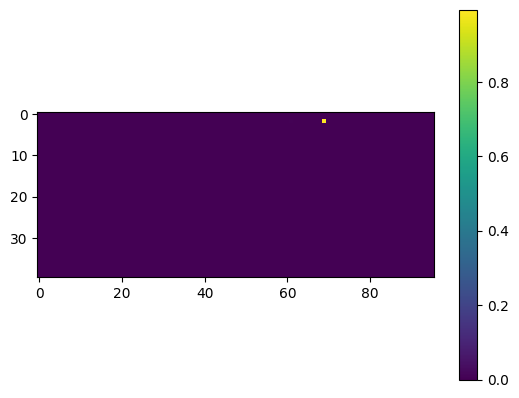

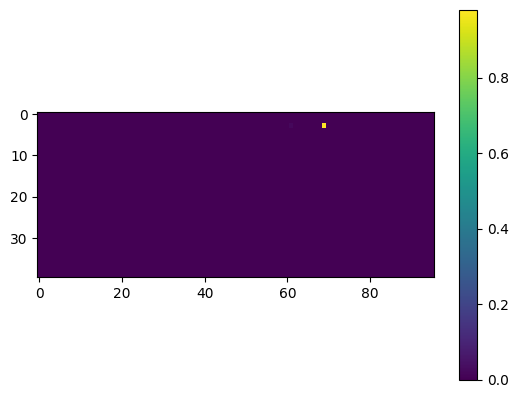

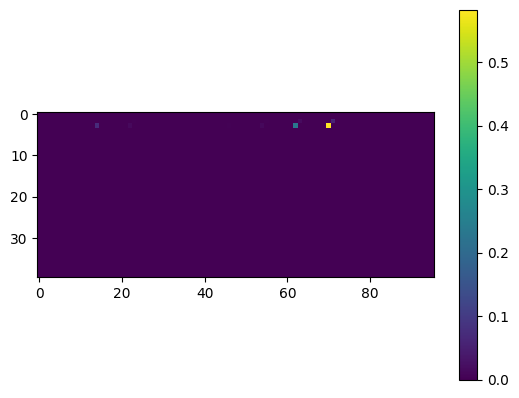

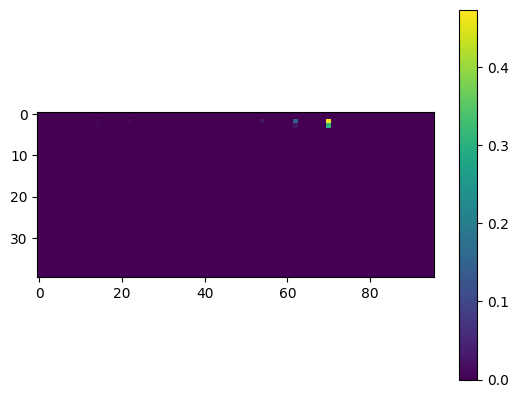

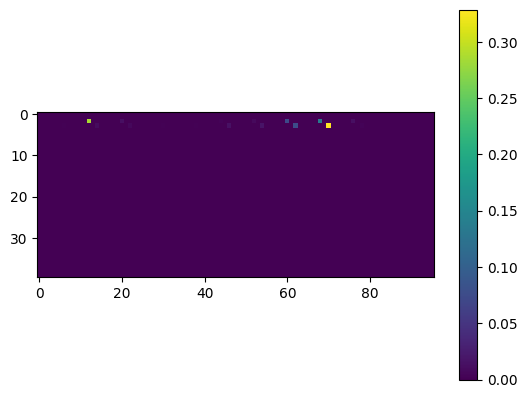

In [14]:
plot(weight.reshape(5, 40, 96))

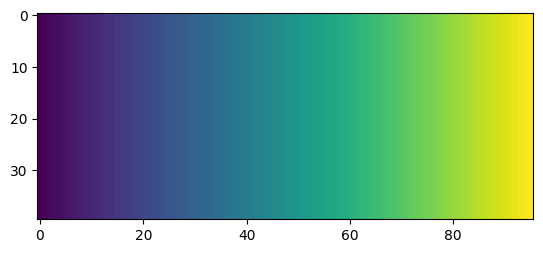

In [10]:
plt.imshow(pos_x.reshape(40, 96))

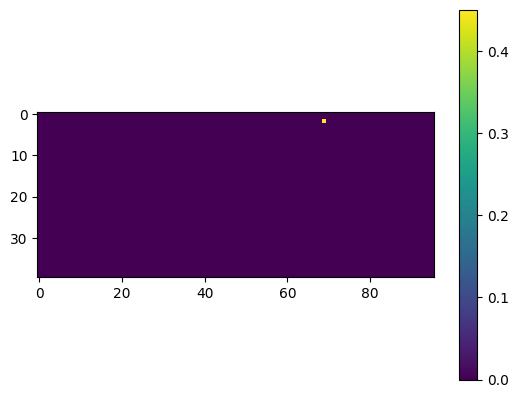

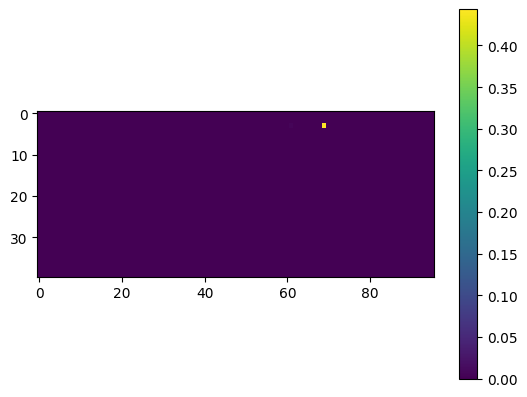

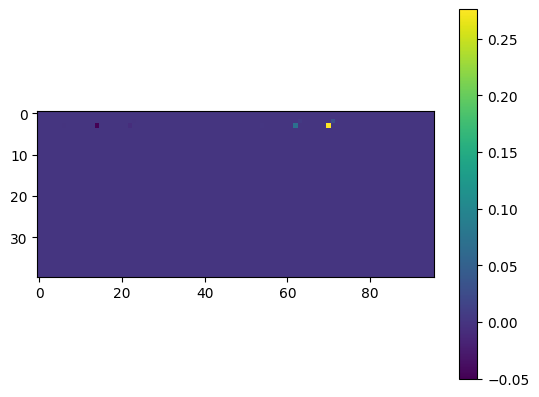

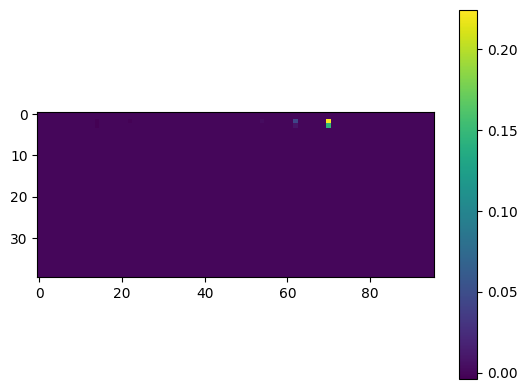

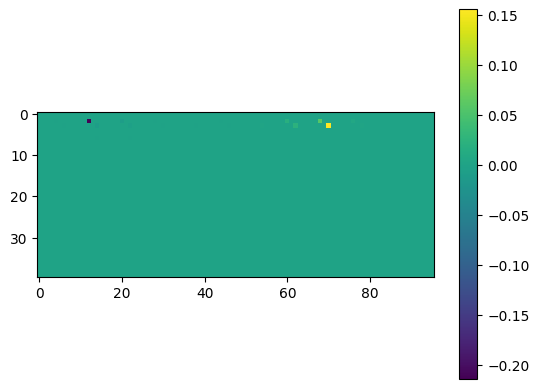

In [13]:
plot(pos_x_weight.reshape(5, 40, 96))

In [ ]:
for i in range(5):
    # print(np.where(x[i] == 0.0, x[i]))
    plt.imshow(x[i], cmap='gray')
    print(np.sum(x[i], axis=0, keepdims=True))
    plt.show()

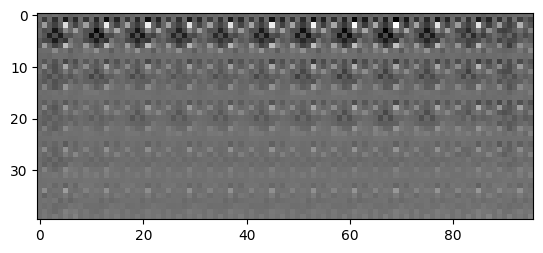

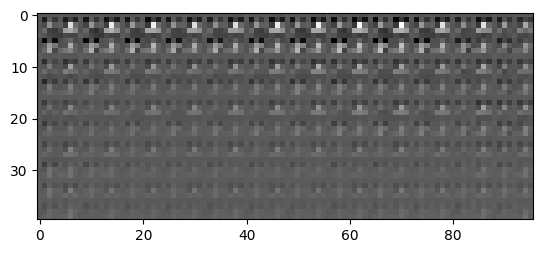

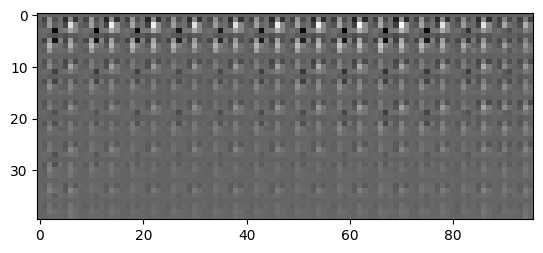

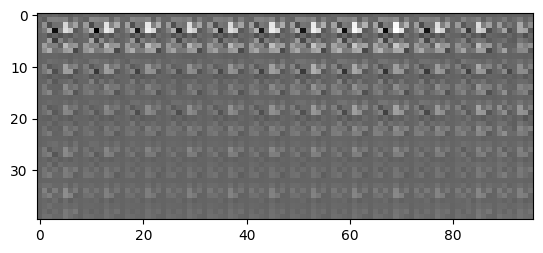

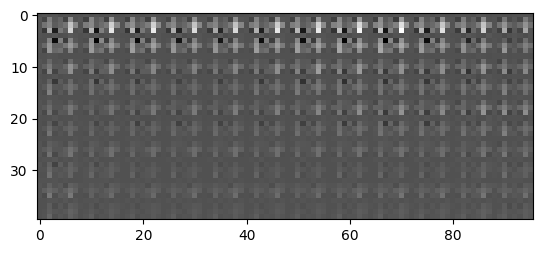

In [8]:
y = np.load('y.npy')
for i in range(5):
    plt.imshow(y[0][i], cmap='gray')
    plt.show()